## Timing our algorithms

In [1]:
import time, random
import pandas as pd
import seaborn as sns
import matplotlib as plt
import sys

In [2]:
from parsers.read_fasta import read_fasta_file
from parsers.read_fastq import read_fastq_file
from search_st import search_suffix

In [61]:
def dna(length=int(), letters="CGTA"):
    return''.join(random.choices(letters, k=length))

def create_fasta(n):
    name = f"test_files/n_{n}.fasta"
    f = open(name, "w")
    
    f.write('>Seq' + str(1) + '\n' + dna(n) + '\n')
    
    f.close()

    return name

def create_fastq(start, stop, step):
    name = f"test_files/m_{stop}.fastq"
    f = open(name, "w")

    counter = 1

    for i in range(start, stop, step):
        f.write(
            '@' + 'Seq' + str(counter) + '\n' + 
            dna(i) + '\n' + 
            '+' + '\n' + 
            '~' * i + '\n'
        )
        counter += 1
    
    f.close()
    
    return name

In [98]:
def time_st(n, m):
    df = pd.DataFrame(range(2000, m, int(m/10)), columns=['m'])
    fastq = create_fastq(2000, m, int(m/10))
    fasta = create_fasta(n)

    fastq_dict = read_fastq_file(fastq)
    fasta_dict = read_fasta_file(fasta)
    times = []


    for item in fastq_dict.items():
        for seq in fasta_dict.items():
            start = time.time()
            search_suffix(seq, item)
            end = time.time()
            difference = end - start
            times.append(difference)
    
    df['Time'] = times

    df['Time/Expected time'] = df['Time']/df['m']**2
    return df


In [99]:
n = 1000000
m = 100000
df_test = time_st(n, m)

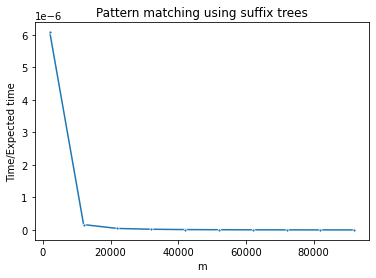

In [113]:
h = sns.lineplot(x = 'm', y = 'Time/Expected time', marker = '.',
                    data = df_test)
h.set_title('Pattern matching using suffix trees')
h.figure.savefig('../figures/search_st.pdf')